In [28]:
import pandas as pd
import numpy as np
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime

In [2]:
# Read dataset
path = '../Dataset/Power Networks/Power-Networks-LCL-June2015(withAcornGps).csv_Pieces/'
filename = '2013_agg_dates.csv'
t = time.time()
df = pd.read_csv(path+filename)
elapsed = time.time() - t

In [37]:
fig_path = '../Figures/'

In [29]:
def make_datetime(year, day, month, hour): # 
    dtstr = '{}-{}-{}'.format(year, int(month), int(day))
    adate = datetime.strptime(dtstr, '%Y-%m-%d')
    newdate = adate.replace(hour=int(hour), minute=0)
    return newdate

# Overview plots

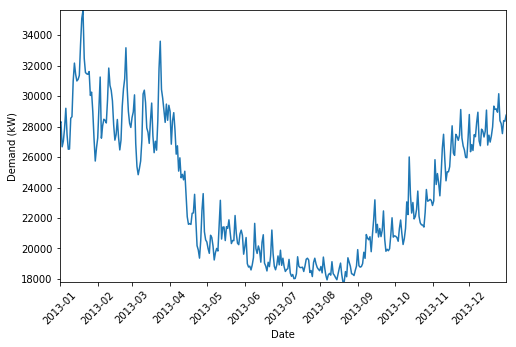

In [38]:
# agg to daily demand
temp = df.groupby(['Month','Day'])['kw'].sum().reset_index()
temp['DateTime'] = temp.apply(lambda row: make_datetime(2013, row['Day'], row['Month'], 0), axis = 1)

fig,ax = plt.subplots(figsize= (8,5)) 
ax.plot(temp['DateTime'], temp['kw']) # plot 
# labels
ax.margins(0)
ax.set_xlabel('Date')
ax.set_ylabel('Demand (kW)')
plt.xticks(rotation = 45)
plt.savefig(fig_path+'daily demand line.png')
plt.show()

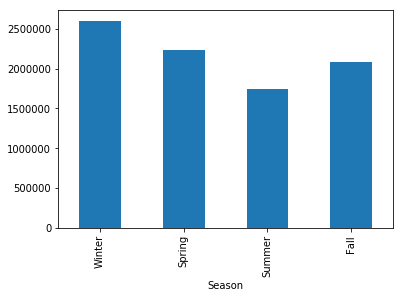

In [6]:
order = ['Winter', 'Spring', 'Summer', 'Fall']
df.groupby('Season')['kw'].sum().loc[order].plot(kind = 'bar') # plot seasons

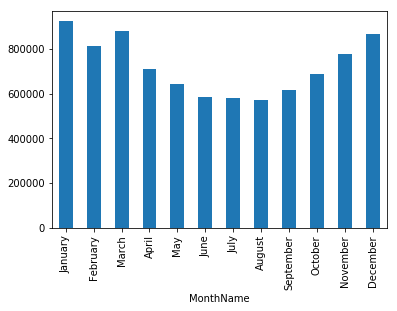

In [7]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df.groupby('MonthName')['kw'].sum().loc[order].plot(kind = 'bar') # plot months

# Seasonal Demand

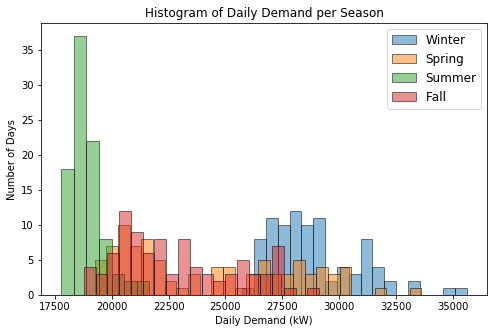

In [9]:
# Group by daily demand
daily = df.groupby(['Season', 'Month', 'Day'])['kw'].sum().reset_index()

fig, ax = plt.subplots(figsize = (8, 5)) # size
for season in df['Season'].unique(): # plot every week
    range_extend = daily['kw'].loc[daily['Season'] ==season].max() - daily['kw'].loc[daily['Season']==season].min()
    bins = int(range_extend/500) # compute bins
    plt.hist(daily['kw'].loc[daily['Season'] == season], bins, alpha = 0.5, label = season, edgecolor = 'black')

# Set labels, legend and titles
plt.title('Histogram of Daily Demand per Season', fontsize = 12)
plt.legend(loc='upper right', fontsize =12)
plt.xlabel('Daily Demand (kW)')
plt.ylabel('Number of Days')
# plt.savefig(fig_path+'histogram daily consumption per season.png')
plt.show()

# Daily Demand per Month

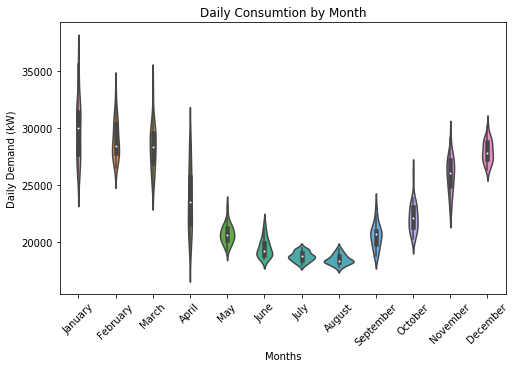

In [10]:
daily_month = df.groupby(['Month','MonthName',  'Day'])['kw'].sum().reset_index() # Aggregate to daily demand

fig, ax = plt.subplots(figsize =(8, 5)) # set size

# plot violins
sns.violinplot(ax = ax, x = daily_month['MonthName'],  
                  y = daily_month['kw'])

# Set titles, labels, titles
plt.title('Daily Consumtion by Month')
plt.xlabel('Months')
plt.ylabel('Daily Demand (kW)')
plt.xticks(rotation = 45)
# plt.savefig(fig_path+'violin plot daily consumption by month.png')
plt.show()

# Dayname demand per week

In [17]:
weektable = df.groupby(['WeekNumber', 'DayName'])['kw'].sum().unstack().reset_index() # group by weekNum and dayname
weektable['Peak'] = weektable.max(axis = 1) # Find max in every week
weektable['Day of Peak'] = weektable[['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']].idxmax(axis =1) # Find day of the weekly peak
weektable.head()

DayName,WeekNumber,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Peak,Day of Peak
0,1,27058.577996,28350.991995,27918.553998,29204.691991,26673.531998,56956.043991,28325.203998,56956.043991,Tuesday
1,2,28651.650004,27474.778002,30996.810000,32173.209999,28548.871999,26513.974002,26528.656002,32173.209999,Sunday
2,3,33398.129999,31434.951999,35099.537995,35628.408003,31360.822003,31000.161990,31101.169996,35628.408003,Sunday
3,4,31615.807989,32487.653996,30048.591999,30264.603993,31438.002006,31555.584003,31469.001996,32487.653996,Monday
4,5,27251.897996,28978.107992,29326.575995,31256.777993,26603.222001,27201.450003,25739.401996,31256.777993,Sunday


## Fast plotting

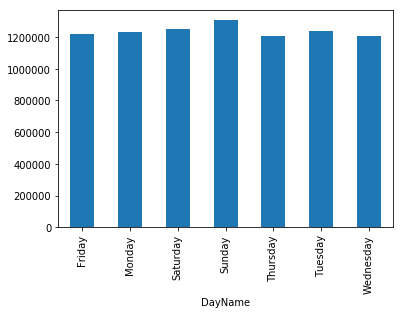

In [18]:
weektable[['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']].sum().plot(kind ='bar') # sum of days

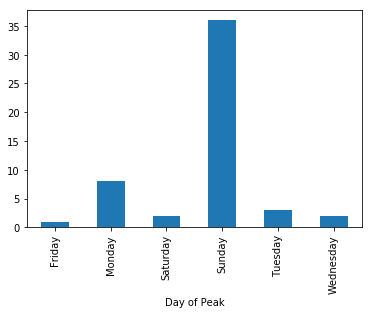

In [19]:
weektable.groupby(['Day of Peak']).size().plot(kind = 'bar') # count of max 

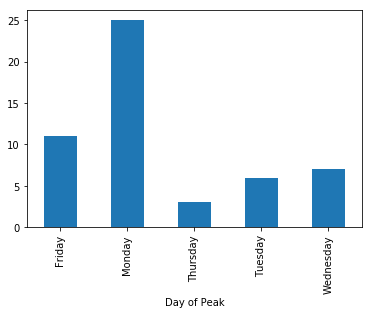

In [20]:
# skip weekends
weektable['Day of Peak'] = weektable[['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday']].idxmax(axis =1)
weektable.groupby(['Day of Peak']).size().plot(kind = 'bar')

In [21]:
weektable.T.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
DayName,,,,,,,,,,,,,,,,,,,,,
WeekNumber,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
Friday,27058.6,28651.7,33398.1,31615.8,27251.9,28240.5,27111.5,30473.3,28599.6,25738.7,...,21401.7,22819.5,24836.6,25368,27100.6,25955.8,27338.7,27318.4,27980,28193.4
Monday,28351,27474.8,31435,32487.7,28978.1,27241.6,30708.6,27287,30573.2,26884.6,...,22116.1,23101.4,24199.7,25871.9,26267.1,27244.9,26352.3,27067.7,26788.8,29162.9
Saturday,27918.6,30996.8,35099.5,30048.6,29326.6,29754.7,27478.3,31145.4,28963.8,27109.4,...,22368.4,23125.9,26583.3,26676.6,27435.8,27260.8,28274.1,27699.3,29346.1,27542
Sunday,29204.7,32173.2,35628.4,30264.6,31256.8,31847.1,28469,33179.1,30085.9,30142.3,...,23868.4,25827.6,27496.7,28053.6,29121.8,28795.8,28946,29085.4,29131.2,28396.4


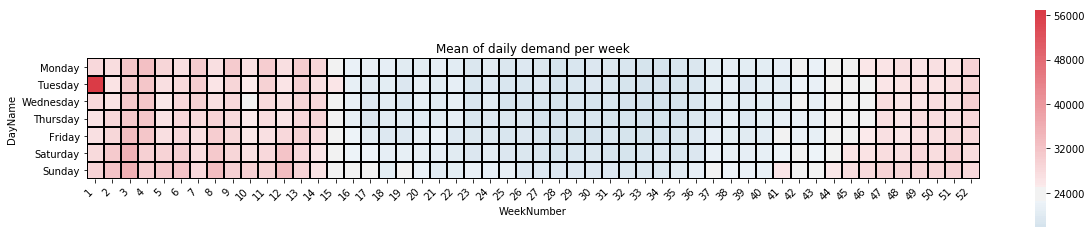

In [23]:
# Heatmap to visualise the table
fig, ax = plt.subplots(figsize = (20, 4))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # set order

# Get mean and set order
red = weektable.groupby('WeekNumber').mean()
red = red[order]

# Heatmap parameters
mini = red.min().min()
maxi = red.max().max()
mean_ = red.mean().mean()
    
# Plot heatmap
ax = sns.heatmap(
red.T, 
vmin=mini, vmax=maxi, center=mean_,
cmap=sns.diverging_palette(240, 10, n=200),
square=True,
linewidths=1, 
linecolor='black'
)

# Set labels
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=45,
horizontalalignment='right'
);

# set title
plt.title('Mean of daily demand per week')
plt.show()

# Find the Busiest Days and Hours

In [24]:
# Houly sum
daytable = df.groupby(['Season', 'Month', 'MonthName', 'DayName', 'Day', 'Hour'])['kw'].sum().unstack().reset_index()
daytable.head()

Hour,Season,Month,MonthName,DayName,Day,0,1,2,3,4,...,14,15,16,17,18,19,20,21,22,23
0,Fall,9,September,Friday,6,680.452000,529.392,484.476000,456.224,480.488000,...,791.938,829.908001,921.311999,986.539999,1095.636001,1193.846000,1209.501999,1123.527999,935.158000,759.864001
1,Fall,9,September,Friday,13,676.058000,527.764,473.728000,436.554,464.858000,...,832.492,881.968000,1007.928000,1185.237998,1348.528000,1381.191999,1265.816001,1137.428000,986.457999,748.157999
2,Fall,9,September,Friday,20,751.536000,589.826,510.252001,477.110,501.826001,...,758.720,821.306000,922.116001,1034.726000,1241.238000,1375.415998,1295.235999,1152.758000,1002.166000,749.058000
3,Fall,9,September,Friday,27,706.082001,520.348,457.934000,439.604,469.354000,...,712.892,783.644000,879.884000,1089.548000,1339.731998,1326.355999,1268.502000,1156.698001,975.520000,777.662000
4,Fall,9,September,Monday,2,656.521999,522.328,471.057999,444.062,454.183999,...,746.996,741.667999,823.366000,967.946001,1074.500000,1212.630000,1284.350000,1118.146000,921.238000,698.832000


In [24]:
# daytable['Hour of Peak'] = daytable.idxmax(axis =1)
# daytable.groupby(['Hour of Peak']).size().plot(kind = 'bar')

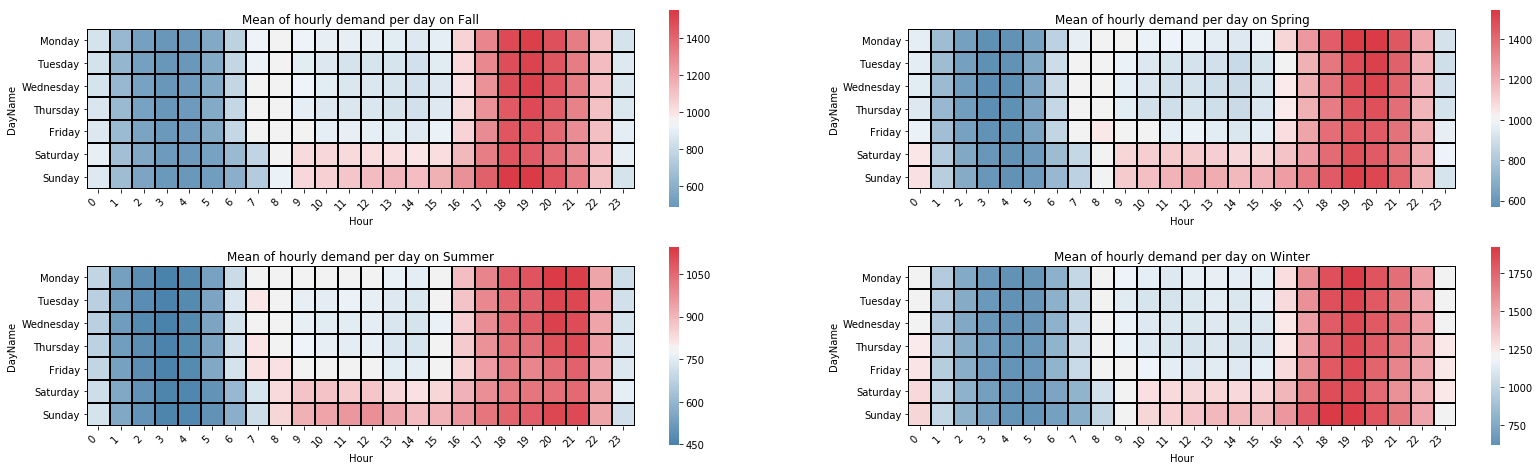

In [25]:
fig, ax = plt.subplots(figsize = (27, 8))
for i, season in enumerate(daytable['Season'].unique()): # 4 seasons
    
    plt.subplot(2, 2, i+1)
    
    # Aggregating dataset
    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    temp =daytable.loc[daytable['Season'] == season]
    red = temp.groupby('DayName')[[i for i in range(0,24)]].mean().loc[order]
    
    # heatmap parameters
    mini = red.min().min()
    maxi = red.max().max()
    mean_ = red.mean().mean()
    
    # heatmap
    ax = sns.heatmap(
        red, 
        vmin=mini, vmax=maxi, center=mean_,
        cmap=sns.diverging_palette(240, 10, n=200),
        square=True,
        linewidths=1, 
        linecolor='black'
    )
    # set labels
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
    # set title
    plt.title('Mean of hourly demand per day on '+season)
plt.savefig(fig_path+'heatmaps hourly consumption per season.png')
plt.show()

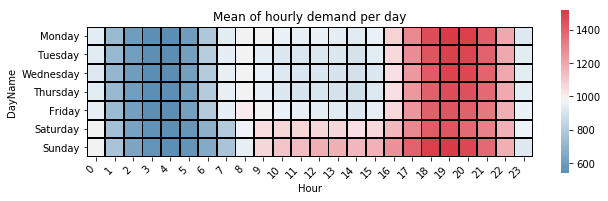

In [30]:
fig, ax = plt.subplots(figsize = (10, 3))

# Aggregating dataset
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
red = daytable.groupby('DayName')[[i for i in range(0,24)]].mean().loc[order]
    
# heatmap parameters
mini = red.min().min()
maxi = red.max().max()
mean_ = red.mean().mean()
    
# plot heatmap
ax = sns.heatmap(
red, 
vmin=mini, vmax=maxi, center=mean_,
cmap=sns.diverging_palette(240, 10, n=200),
square=True,
linewidths=1, 
linecolor='black'
)
# plot labels and titles
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=45,
horizontalalignment='right'
);
plt.title('Mean of hourly demand per day')
# plt.savefig(fig_path+'heatmap hourly consumption.png')
plt.show()

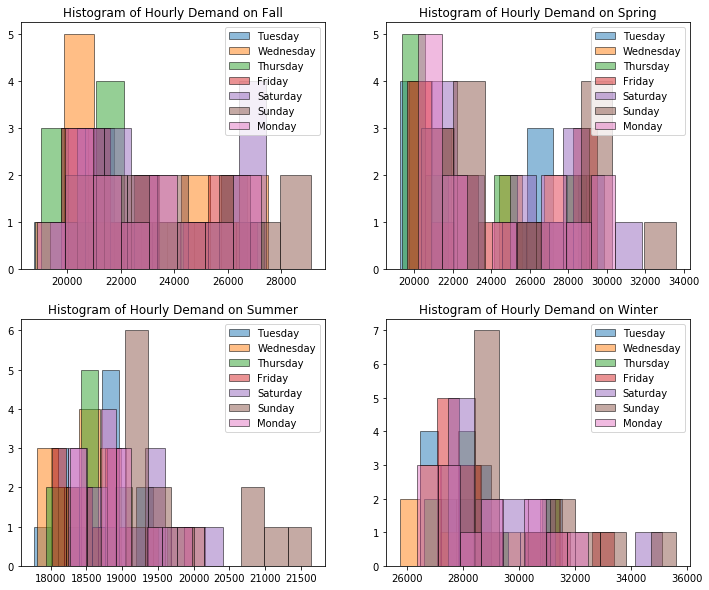

In [29]:
# Dayname histogrames for every season 
hourly = df.groupby(['Season', 'Month', 'Day', 'DayName'])['kw'].sum().reset_index()
fig, ax = plt.subplots(figsize = (12, 10))
for i, season in enumerate(hourly['Season'].unique()): # loop over seasons
    plt.subplot(2, 2, i+1)
    for dname in df['DayName'].unique(): # loop over daynames for each season
        f_day = hourly['DayName'] == dname
        f_season = hourly['Season'] == season
        bins = 8
        plt.hist(hourly['kw'].loc[f_season & f_day], bins, alpha = 0.5, label = dname, edgecolor = 'black')
    plt.title('Histogram of Hourly Demand on '+season)
    plt.legend(loc='upper right')
plt.show()

# Consumption of Groups

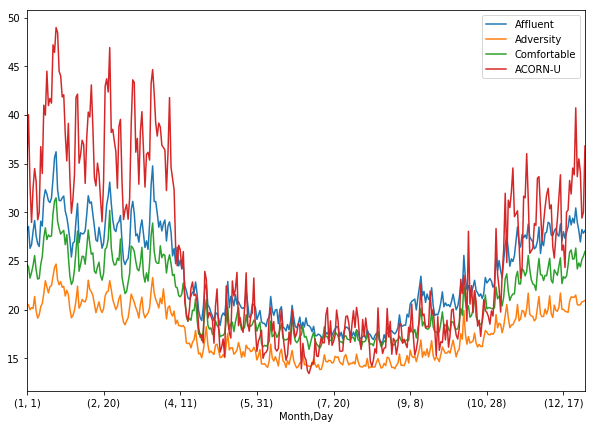

In [28]:
for group in df['Acorn_grouped'].unique(): # loop over groups
    count = df['LCLid'].loc[df['Acorn_grouped'] == group].nunique()
    df.loc[df['Acorn_grouped'] == group].groupby(['Month', 'Day'])['kw'].apply(lambda row: row.sum()/count).plot(kind= 'line', figsize = (10,7), label = group)
plt.legend(loc = 'upper right')

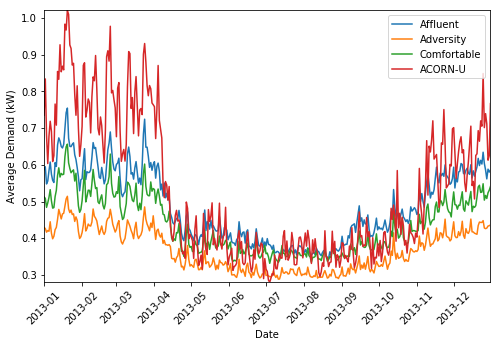

In [43]:
fig,ax = plt.subplots(figsize= (8,5))
groups = df['Acorn_grouped'].unique()
for group in groups: # loop over groups
    temp = df.loc[df['Acorn_grouped'] == group].groupby(['Month','Day'])['kw'].mean().reset_index() # aggregate mean
    temp['DateTime'] = temp.apply(lambda row: make_datetime(2013, row['Day'], row['Month'], 0), axis = 1) # get datetime
    ax.plot(temp['DateTime'], temp['kw']) # plot
# Set labels, legend
ax.margins(0)
ax.set_xlabel('Date')
ax.set_ylabel('Average Demand (kW)')
plt.xticks(rotation = 45)
plt.legend(groups,loc = 'upper right')
plt.savefig(fig_path+'group mean demand demand.png')
plt.show()